In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
def num_to_char(i):
  if i == 0:
    return 'I'
  if i == 1:
    return 'Z'
  if i == 2:
    return 'X'
  if i == 3:
    return 'Y'
  return False

def string_process(s):
  ns = ''
  for i in range(len(s)):
    ns = ns + num_to_char((int)(s[i]))
  return ns
  
def process_family(f):
  nf = []
  for s in f:
    nf = nf + [string_process(s)]
  return nf

def check_families(families):
  N = len(families)
  string_list_total = []
  for i in range(N):
    family = families[i]
    for j in range(len(family)):
      ts = family[j]
      for k in range(len(family)):
        if not do_commute(ts,family[k]):
          print(ts + ' and ' + family[k] + 'do not commute')
          return False
  for i in range(N):
    string_list_total = string_list_total + families[i]
  N = len(string_list_total)
  for i in range(N):
    for j in range(i+1,N):
      if(string_list_total[i] == string_list_total[j]):
        print(string_list_total[i])
        return False
  return True

def do_commute(s1,s2):
  cur = True
  for i in range(len(s1)):
    if not ((s1[i] == '0') | (s2[i] == '0') | (s1[i] == s2[i])):
      cur = not cur
  return cur

def commute(s1,s2):
  ns = ''
  for i in range(len(s1)):
    if (s1[i] == s2[i]):
      ns = ns + '0'
    else:
      if (s1[i] == '0'):
        ns = ns + s2[i]
      else:
        if s2[i] == '0':
          ns = ns + s1[i]
        else:
          x = ['1','2','3']
          x.remove(s1[i])
          x.remove(s2[i])
          ns = ns + x[0]
  return ns

def trivial_family(m):
  N = 2**m
  f=[]
  for i in range(1,N):
    ns = bin(i)[2:]
    while(len(ns)<m):
      ns = '0'+ ns
    f = f + [ns]
  return f

def x_family(m):
  tf = trivial_family(m)
  for i in range(len(tf)):
    tf[i] = list(tf[i])
    for j in range(len(tf[i])):
      if(tf[i][j] == '1'):
        tf[i][j] = '2'
    tf[i] = ''.join(tf[i])
  return tf

def replace_with_x(s):
  s = list(s)
  for k in range(len(s)):
    if(s[k] == '1'):
      s[k] = '2'
  s = ''.join(s)
  return s

def get_string(i,j,x,z):
  a = x[i]
  #print(a)
  b = z[j]
  #print(b)
  c = ((int)(a)) + ((int)(b))
  c = str(c)
  while(len(c)<m):
    c = "0" + c
  return c

def make_A(a):
  m = len(a)
  data = []
  row = [0]*m
  row[0] = a[0]
  row[1] = 1
  data= data + [row]
  for i in range(1,m-1):
    row = [0]*m
    row[i] = a[i]
    row[i+1] = 1
    row[i-1] = 1
    data= data + [row]
  row = [0]*m
  row[m-1] = a[m-1]
  row[m-2] = 1
  data= data + [row]
  return data

'''
def mult(A,B):
  m = len(A)
  C = []
  for i in range(m):
    row = []
    for k in range(m):
      s = 0
      for j in range(m):
        s = s + A[i][j]*B[j][k]
      s = s%2
      row = row + [s]
    C = C + [row]
  return C

def square(A):
  m = len(A)
  A_square = []
  for i in range(m):
    row = []
    for k in range(m):
      s = 0
      for j in range(m):
        s = s + A[i][j]*A[j][k]
      s = s%2
      row = row + [s]
    A_square = A_square + [row]
  return A_square

def A_equals(A,B):
  for i in range(len(A)):
    if (A[i] == B[i]):
      return True
  return False


def check(A):
  m = len(A)
  hits = [A[0]]
  temp = A.copy()
  N = 2**m
  for i in range(N-2):
    A = mult(A,temp)
    if(A[0] in hits):
      return False
    else:
      hits = hits + [A[0].copy()]
  A = mult(A,temp)
  return A == temp
'''

def mat_times_vec(A,v):
    m = len(A)
    r = []
    for i in range(m):
        s=0
        for j in range(m):
            s = s + A[i][j] * v[j]
        r = r + [s%2]
    return r
            
def check(A):
  m = len(A)
  N = 2**m
  one = [0]*(m-1) + [1]
  v=one.copy()
  hits = [False]*N
  hits[to_int(v)-1] = True
  for i in range(N-2):
    r = mat_times_vec(A,v)
    r_int = to_int[r]
    if(hits[r_int-1]):
      return False
    else:
      hits[r_int-1] = True
    v = r.copy()
  r = mat_times_vec(A,v)
  return r == one


def try_all_offs(m):
  N = 2**m
  for i in range(1,N):
    l = bin(i)[2:]
    while(len(l)<m):
      l = '0' + l
    l = list(l)
    for i in range(m):
      l[i] = int(l[i])
    A = make_A(l)
    if(check(A)):
      return A

def bin_add(a,b):
  c=[]
  for i in range(len(a)):
    if(a[i] == b[i]):
      c = c + [0]
    else:
      c = c + [1]
  return c

def to_int(a):
  m=len(a)
  s=0
  for j in range(m):
    if(a[m-j-1] == 1):
      s = s + 2**j
  return s


def process_A(A):
  l1 = []
  for i in range(m):
    t = A[m-i-1]
    N = len(l1)
    #print(t)
    l1 = l1 + [t]
    #print(to_int(t))
    for j in range(N):
      l1 = l1 + [bin_add(l1[j],t)]
  for i in range(len(l1)):
    l1[i] = to_int(l1[i])
  
  data = [l1]
  prev = l1.copy()
  N = 2**m - 1
  for i in range(N-1):
    next = []
    for j in range(N):
      next = next + [prev[l1[j]-1]]
    data = data + [next]
    prev = next.copy()
  return data


m=5
N = 2**m-1

A = try_all_offs(m)
'''for row in A:
  print(row)
print()
B = A.copy()
for i in range(m-1):
  B = square(B)
  for row in B:
    print(row)
  print("B")'''

sol = process_A(A)

#if(sol):
#  show(sol)
x = x_family(m)
  
z = trivial_family(m)

print(N)
print(len(x))

f = [z,x]
for i in range(N):
  newf = []
  for j in range(N):
    newf = newf + [get_string(j,sol[i][j]-1,x,z)]
  f = f + [newf]

with open('paulisolution' + str(m) + '.txt', 'w+') as fl:
    for fam in f:
        fl.write(str(process_family(fam)))

#check_families(f)

TypeError: 'function' object is not subscriptable

C:\Users\benjr\AppData\Local\Temp\ipykernel_7696\1036789562.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


9.042909383770448e-09
1.1501926368651074e-09
0.037928710999985925
0.004824257577573867


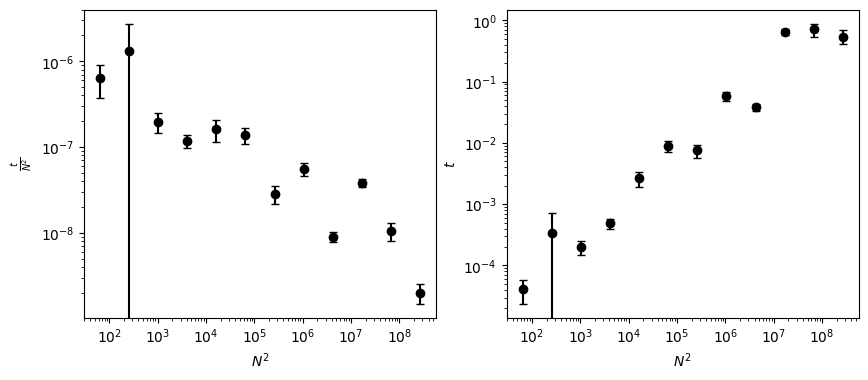

In [27]:
plt.figure(figsize = (10,4))

x = []
y = []
y_unscaled = []
sigma_unscaled = []
sigma = []
for m in range(3,15):
  N = 4**m
  data = []
  data_unscaled = []
  for i in range(100):
    dpt = timeit.timeit(lambda: try_all_offs(m),number = 1)
    data = data + [dpt/N]
    data_unscaled = data_unscaled + [dpt]
  t = np.average(data)
  terr = np.std(data)
  x = x + [N]
  y = y + [t]
  y_unscaled = y_unscaled + [np.average(data_unscaled)]
  sigma_unscaled = sigma_unscaled + [np.std(data_unscaled)]
  sigma = sigma + [terr]


x_dot = [x[0],x[len(x)-1]]
y_dot = [y[0],y[0]]

plt.subplot(2,2,1)
plt.scatter(x,y)
plt.errorbar(x,y,sigma,capsize = 3)
#plt.plot(x_dot,y_dot,linestyle = 'dotted', label = 'linear scaling')
plt.ylabel(r'$ \frac{t}{N^2}$')
plt.xlabel(r'$N^2$')
#plt.legend()


plt.subplot(1,2,1)
plt.loglog()
plt.scatter(x,y,color='black')
plt.errorbar(x,y,sigma,capsize = 3,linestyle = 'none',color='black')
#plt.plot(x_dot,y_dot,linestyle = 'dotted', label = 'linear scaling')
plt.ylabel(r'$ \frac{t}{N^2}$')
plt.xlabel(r'$N^2$')
#plt.legend()

'''
plt.subplot(2,2,3)
plt.scatter(x,y_unscaled)
plt.errorbar(x,y_unscaled,sigma_unscaled,capsize = 3)
#plt.plot(x_dot,y_dot,linestyle = 'dotted', label = 'linear scaling')
plt.ylabel(r'$t$')
plt.xlabel(r'$N^2$')
'''


plt.subplot(1,2,2)
plt.loglog()
plt.scatter(x,y_unscaled,color='black')
plt.errorbar(x,y_unscaled,sigma_unscaled,capsize = 3,linestyle = 'none',color='black')
#plt.plot(x_dot,y_dot,linestyle = 'dotted', label = 'linear scaling')
plt.ylabel(r'$t$')
plt.xlabel(r'$N^2$')

In [ ]:
def check(A):
  m = len(A)
  N = 2**m
  one = [0]*(m-1) + [1]
  v=one.copy()
  hits = [False]*N
  hits[to_int(v)-1] = True
  for i in range(N-2):
    r = mat_times_vec(A,v)
    r_int = to_int(r)
    if(hits[r_int-1]):
      return False
    else:
      hits[r_int-1] = True
    v = r.copy()
  r = mat_times_vec(A,v)
  return r == one

def get_vec(m):
  N = 2**m
  for i in range(1,N):
    if(i%10 == 0):
        print("Try l = " + str(i))
    l = bin(i)[2:]
    while(len(l)<m):
      l = '0' + l
    l = list(l)
    for i in range(m):
      l[i] = int(l[i])
    A = make_A(l)
    if(check(A)):
      s=0
      for j in range(m):
        s = s + l[j]*2**(m-j-1)
      return s

for i in range(27,40):
  x = get_vec(i)
  print("m = " + str(i) + " and a = " + str(x))

KeyboardInterrupt: 

m = 19 and a = 4
m = 20 and a = 6
m = 21 and a = 50
m = 22 and a = 11
m = 23 and a = 1
m = 24 and a = 46
m = 25 and a = 11
m = 26 and a = 1